# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
#from panel.interact import interact
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
total_dwelling_types = to_data.groupby('year').sum()
total_dwelling_types.drop(total_dwelling_types.iloc[:, 8:11], axis = 1, inplace=True)
total_dwelling_types

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [5]:
# Save the dataframe as a csv file
total_dwelling_types.to_csv('Data/total_toronto_dwelling_types.csv')

In [6]:
# Helper create_bar_chart function
def create_bar_chart(year, data, color):
    data = total_dwelling_types.iloc[year].plot(
        kind='bar', 
        rot=90,
        title=f"Dwellling Types in Toronto {data.index[year]}", 
        xlabel=f"{data.index[year]}",
        ylabel="Dwelling Type Units",
        color=color
    );
    return data
   

In [7]:
# def create_bar_chart2(year, data, color):
#     bar_chart = data.iloc[year].plot(
#         kind='bar', 
#         rot=90,
#         title=f"Dwellling Types in Toronto {data.index[year]}", 
#         xlabel=f"{data.index[year]}",
#         ylabel="Dwelling Type Units",
#         color=color
#     );
#     return bar_chart
    

<AxesSubplot:title={'center':'Dwellling Types in Toronto 2001'}, xlabel='2001', ylabel='Dwelling Type Units'>

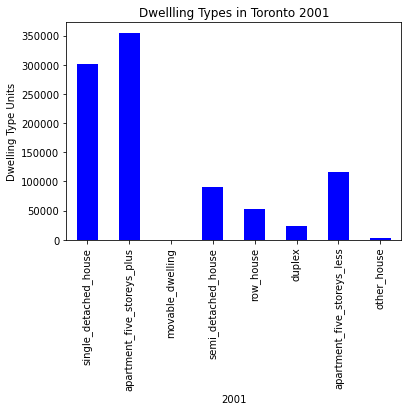

In [8]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(0,total_dwelling_types, "b")
# total_dwelling_types.iloc[0].plot(
#     kind='bar', 
#     rot=90, title=f'Dwelling Types in Toronto {total_dwelling_types.index[0]}', 
#     xlabel=f'{total_dwelling_types.index[0]}', 
#     ylabel='Dwelling Type Units'
# );

<AxesSubplot:title={'center':'Dwellling Types in Toronto 2006'}, xlabel='2006', ylabel='Dwelling Type Units'>

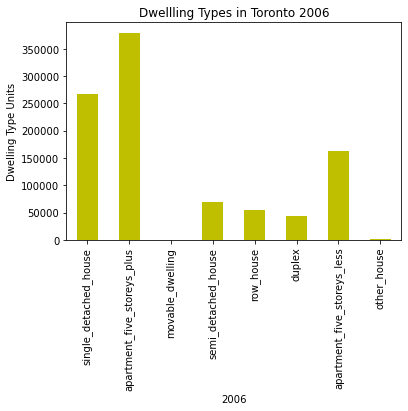

In [9]:
# Bar chart for 2006
create_bar_chart(1,total_dwelling_types, "y")
# total_dwelling_types.iloc[1].plot(
#     kind='bar', 
#     rot=90, title=f'Dwelling Types in Toronto {total_dwelling_types.index[1]}', 
#     xlabel=f'{total_dwelling_types.index[1]}', 
#     ylabel='Dwelling Type Units', 
#     color='r'
# );

<AxesSubplot:title={'center':'Dwellling Types in Toronto 2011'}, xlabel='2011', ylabel='Dwelling Type Units'>

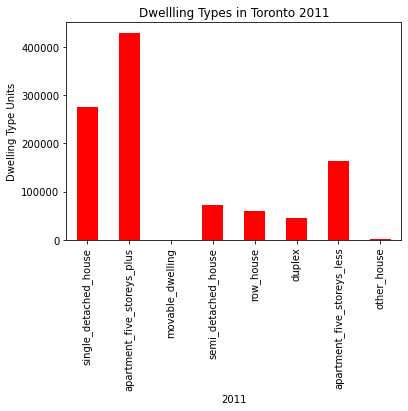

In [10]:
# Bar chart for 2011
create_bar_chart(2,total_dwelling_types, "r")
# total_dwelling_types.iloc[2].plot(
#     kind='bar', rot=90, 
#     title=f'Dwelling Types in Toronto {total_dwelling_types.index[2]}', 
#     xlabel=f'{total_dwelling_types.index[2]}', 
#     ylabel='Dwelling Type Units', 
#     color='y'
# );

<AxesSubplot:title={'center':'Dwellling Types in Toronto 2016'}, xlabel='2016', ylabel='Dwelling Type Units'>

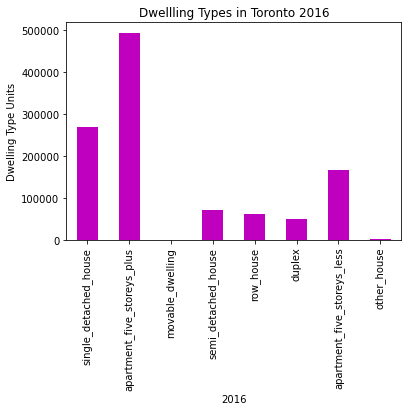

In [11]:
# Bar chart for 2016
create_bar_chart(3,total_dwelling_types, "m")
# total_dwelling_types.iloc[3].plot(
#     kind='bar', rot=90, 
#     title=f'Dwelling Types in Toronto {total_dwelling_types.index[3]}', 
#     xlabel=f'{total_dwelling_types.index[3]}', 
#     ylabel='Dwelling Type Units',m
#     color='m'
# );

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [12]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_shelter_costs = to_data.groupby('year').mean()
avg_shelter_costs.drop(avg_shelter_costs.iloc[:, :9], axis = 1, inplace=True)
avg_shelter_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [39]:
# Helper create_line_chart function
#def create_line_chart(data, title, xlabel, ylabel, color):

def create_line_chart(data, color):
    data = data.plot(
        kind='line', 
        rot=90,
        title='Average Monthly Shelter Cost for Owned Dwellings in Toronto', 
        xlabel='Year',
        ylabel="Dwelling Type Units",
        color=color
    );
    return data
    """
    Create a line chart based in the data argument.
    """

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Owned Dwellings in Toronto'}, xlabel='Year', ylabel='Dwelling Type Units'>

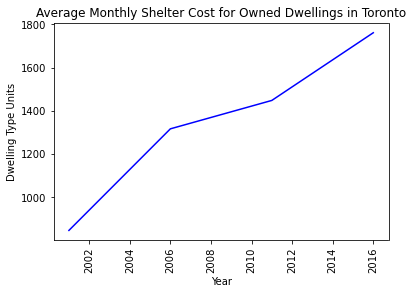

In [40]:
# Create two line charts, one to plot the monthly shelter costs for owned dwellings and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(avg_shelter_costs['shelter_costs_owned'], 'b')
# avg_shelter_costs['shelter_costs_owned'].plot(
#     title='Average Monthly Shelter Cost for Owned Dwellings in Toronto', 
#     xlabel='Year', 
#     ylabel='Dwelling Type Units',
# );

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Owned Dwellings in Toronto'}, xlabel='Year', ylabel='Dwelling Type Units'>

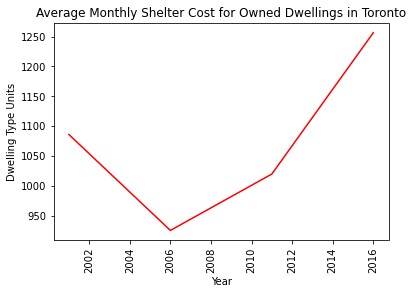

In [42]:
# Line chart for rented dwellings
create_line_chart(avg_shelter_costs['shelter_costs_rented'], 'r')
# avg_shelter_costs['shelter_costs_rented'].plot(
#     title='Average Monthly Shelter Cost for Rented Dwellings in Toronto', 
#     xlabel='Year', 
#     ylabel='Dwelling Type Units',
#     color='r'
# );

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [16]:
# Calculate the average house value per year
avg_house_value = to_data['average_house_value'].groupby('year').mean()
avg_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

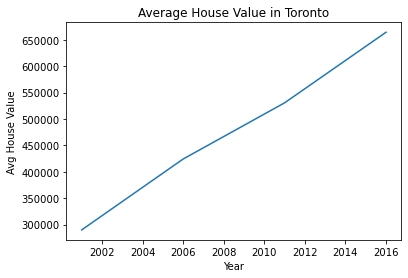

In [17]:
# Plot the average house value per year as a line chart
avg_house_value.plot(
    title='Average House Value in Toronto', 
    xlabel='Year', 
    ylabel='Avg House Value',
    legend=None
);

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [18]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_value_hood = to_data[['neighbourhood', 'average_house_value']]
avg_house_value_hood.columns = ['Neighbourhood', 'Average House Value']
avg_house_value_hood.index.names = ['Year']
#.rename(columns = {'neighbourhood':'Neighbourhood', 'average_house_value':'Average House Value'}, inplace=True)
avg_house_value_hood.head()

Neighbourhood  Average House Value
Year                                                   
2001               Agincourt North               200388
2001  Agincourt South-Malvern West               203047
2001                     Alderwood               259998
2001                         Annex               453850
2001             Banbury-Don Mills               371864

In [34]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_house_value_hood.hvplot(x='Year', y='Average House Value', groupby='Neighbourhood', yformatter='%0f')


:DynamicMap   [Neighbourhood]
   :Curve   [Year]   (Average House Value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [20]:
# Fetch the data of all dwelling types per year
dwelling_types = to_data.drop(to_data.iloc[:, 9:12], axis = 1, inplace=False)

In [21]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types.hvplot.bar(stacked=False, groupby='neighbourhood', yformatter='%0f', rot=90, height=500)

:DynamicMap   [neighbourhood]
   :Bars   [Year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [22]:
# Getting the data from the top 10 expensive neighbourhoods
top10_hoods = to_data.groupby('neighbourhood').mean().nlargest(10, 'average_house_value')
top10_hoods.rename(columns = {'average_house_value':'Average House Value'}, inplace=True)
top10_hoods.index.names = ['Neighbourhood']
top10_hoods.head()

single_detached_house  \
Neighbourhood                                              
Bridle Path-Sunnybrook-York Mills                2260.00   
Forest Hill South                                1742.50   
Lawrence Park South                              3472.50   
Rosedale-Moore Park                              2498.75   
St.Andrew-Windfields                             3225.00   

                                   apartment_five_storeys_plus  \
Neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   

                                   movable_dwelling  semi_detached_house  \
Neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   

                                   row_house  duplex  \
Neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   

                                   apartment_five_storeys_less  other_house  \
Neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   

                                   Average House Value  shelter_costs_owned  \
Neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills           1526485.75              2360.75   
Forest Hill South                           1195992.50              1781.00   
Lawrence Park South                         1094027.75              1954.00   
Rosedale-Moore Park                         1093640.00              1909.75   
St.Andrew-Windfields                         999107.00              1880.25   

                                   shelter_costs_rented  
Neighbourhood                                            
Bridle Path-Sunnybrook-York Mills               2321.75  
Forest Hill South                               1313.75  
Lawrence Park South                             1372.75  
Rosedale-Moore Park                             1537.25  
St.Andrew-Windfields                            1384.50

In [35]:
# Plotting the data from the top 10 expensive neighbourhoods
top10_hoods.hvplot.bar(x='Neighbourhood', y='Average House Value', yformatter='%0f', rot=90, height=500)

:Bars   [Neighbourhood]   (Average House Value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [24]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [59]:
# Calculate the mean values for each neighborhood
# mean_hood_values = to_data.groupby('neighbourhood').mean()
mean_hood_values = to_data[['neighbourhood','average_house_value']].groupby('neighbourhood').mean()

In [60]:
# Join the average values with the neighbourhood locations
hood_locations = df_neighbourhood_locations.set_index('neighbourhood')
mean_values_location = pd.concat([mean_hood_values, hood_locations], axis='columns', join='inner')
mean_values_location.head()

average_house_value        lat        lon
neighbourhood                                                          
Agincourt North                          329811.5  43.805441 -79.266712
Agincourt South-Malvern West             334189.0  43.788658 -79.265612
Alderwood                                427922.5  43.604937 -79.541611
Annex                                    746977.0  43.671585 -79.404001
Banbury-Don Mills                        612039.0  43.737657 -79.349718

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

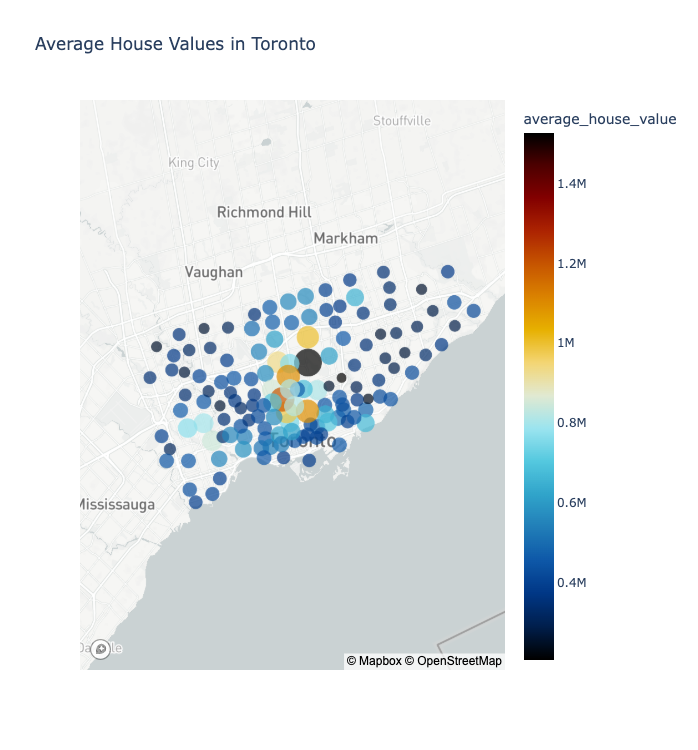

In [62]:
# Create a scatter mapbox to analyze neighbourhood info
mean_values_location.reset_index(inplace=True)
mapbox_values_location = px.scatter_mapbox(
    mean_values_location, 
    lat='lat', 
    lon='lon', 
    color='average_house_value', 
    size='average_house_value', 
    color_continuous_scale=px.colors.cyclical.IceFire,
    title='Average House Values in Toronto',
    hover_data={'neighbourhood': True},
    zoom=9,
    height=750,
    )
mapbox_values_location.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [87]:
avg_house_value_hood.reset_index(inplace=True)
avg_house_values_hood_plot = px.bar(
    avg_house_value_hood, 
    x='Neighbourhood', 
    y='Average House Value', 
    color='Average House Value', 
    facet_row='Year', width=1000, 
    height=1000,
    title='Average Toronto House Values per Neighbourhood'
)

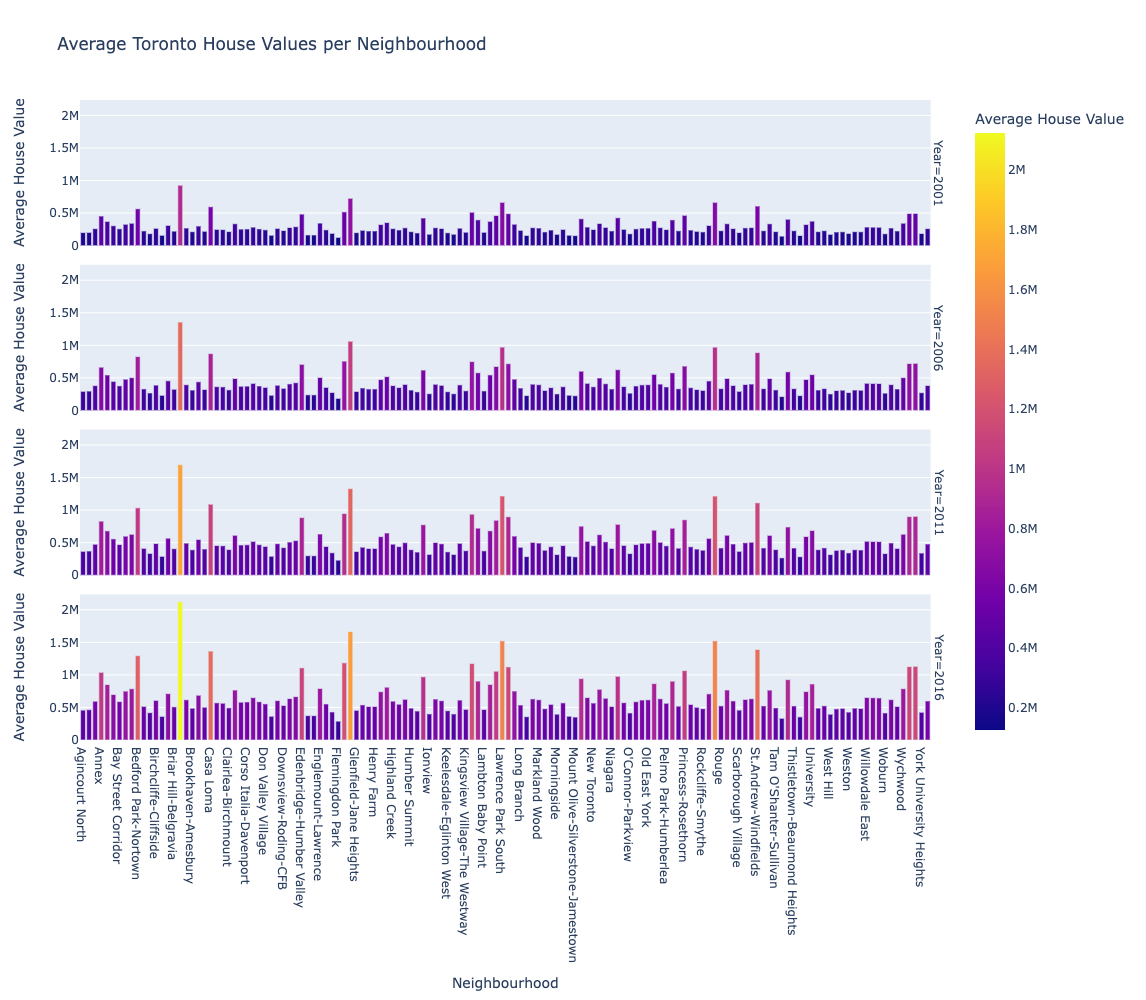

In [88]:
avg_house_values_hood_plot

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [104]:
# Fetch the data from all expensive neighbourhoods per year.
expensive_hoods = to_data[['neighbourhood', 'shelter_costs_owned', 'shelter_costs_rented']]
expensive_hoods.reset_index(inplace=True)

In [105]:
expensive_hoods

Year                 neighbourhood  shelter_costs_owned  \
0    2001               Agincourt North                  810   
1    2001  Agincourt South-Malvern West                  806   
2    2001                     Alderwood                  817   
3    2001                         Annex                 1027   
4    2001             Banbury-Don Mills                 1007   
..    ...                           ...                  ...   
555  2016                      Wychwood                 1864   
556  2016                Yonge-Eglinton                 2398   
557  2016                Yonge-St.Clair                 2192   
558  2016       York University Heights                 1444   
559  2016            Yorkdale-Glen Park                 1451   

     shelter_costs_rented  
0                     870  
1                     892  
2                     924  
3                    1378  
4                    1163  
..                    ...  
555                  1146  
556                  1535  
557                  1619  
558                  1122  
559                  1128  

[560 rows x 4 columns]

In [109]:
len(expensive_hoods)

560

In [117]:
# Create the sunburst chart
expensive_hoods_sunburst = px.sunburst(expensive_hoods, path=['Year', 'neighbourhood'], values='shelter_costs_owned', width=1000, height=1000)

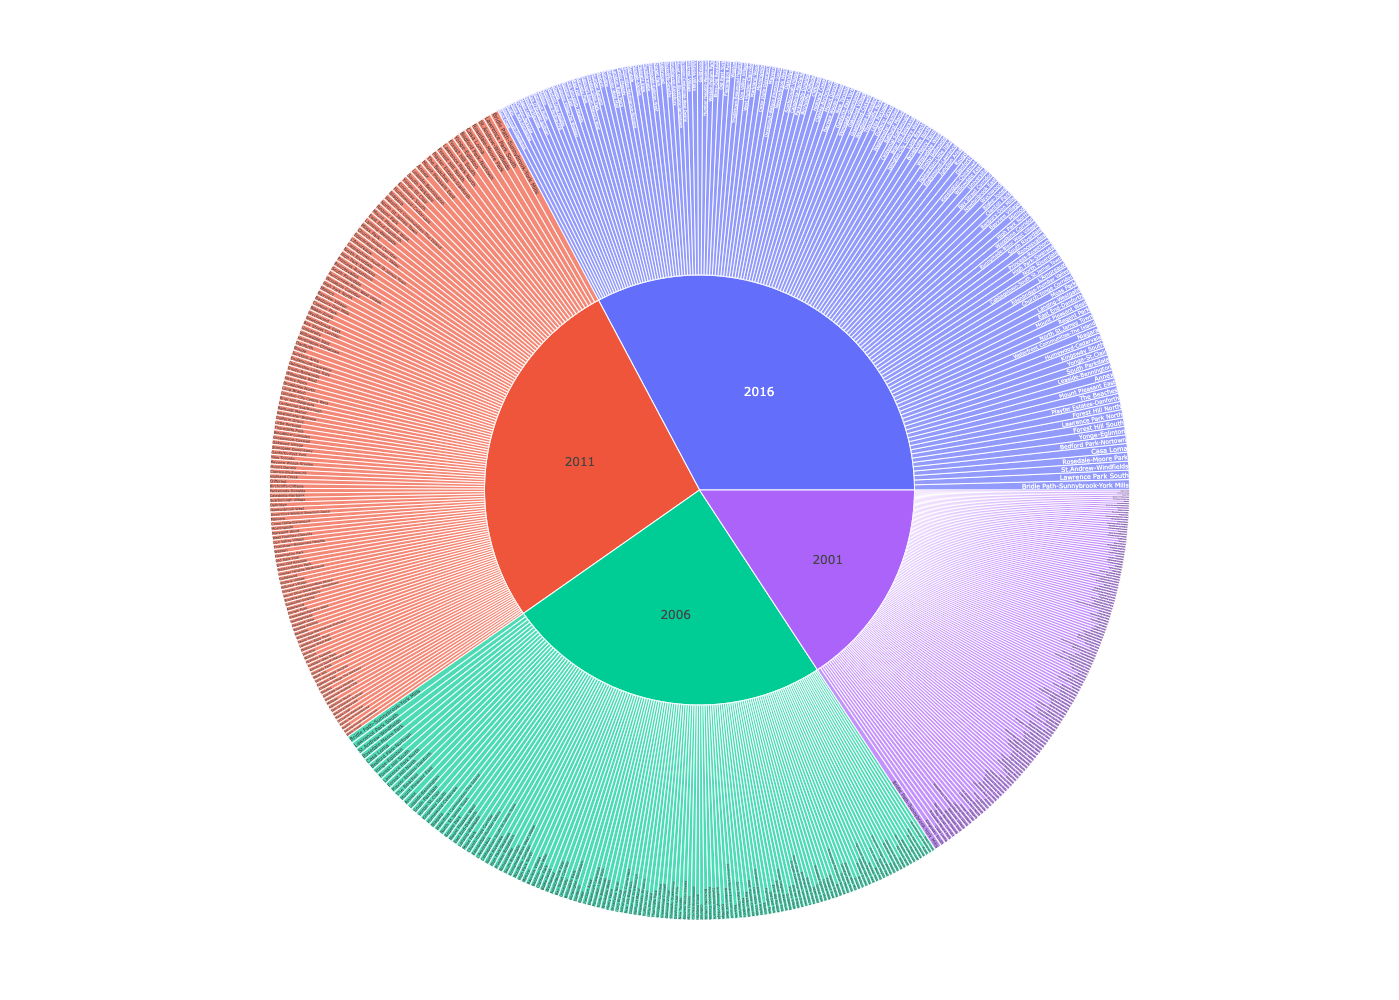

In [118]:
expensive_hoods_sunburst